In [1]:
import pandas as pd
import seaborn as sns


In [2]:
path = "/content/drive/MyDrive/Classroom/Computação Educacional/Mulheres na CComp/DadosRebeca.csv"
df = pd.read_csv(path)

In [3]:
df["PERIODO_EVASAO"]

0       1º Semestre
1       2º Semestre
2       1º Semestre
3       2º Semestre
4       1º Semestre
           ...     
2456    1º Semestre
2457    2º Semestre
2458    1º Semestre
2459    2º Semestre
2460            NaN
Name: PERIODO_EVASAO, Length: 2461, dtype: object

In [4]:
#df.info(verbose=True)

In [5]:
sns.set_theme(style="whitegrid", palette="pastel")

In [6]:
#sns.pairplot(data=df,hue='SEXO',height=3,dropna=True,corner=True)

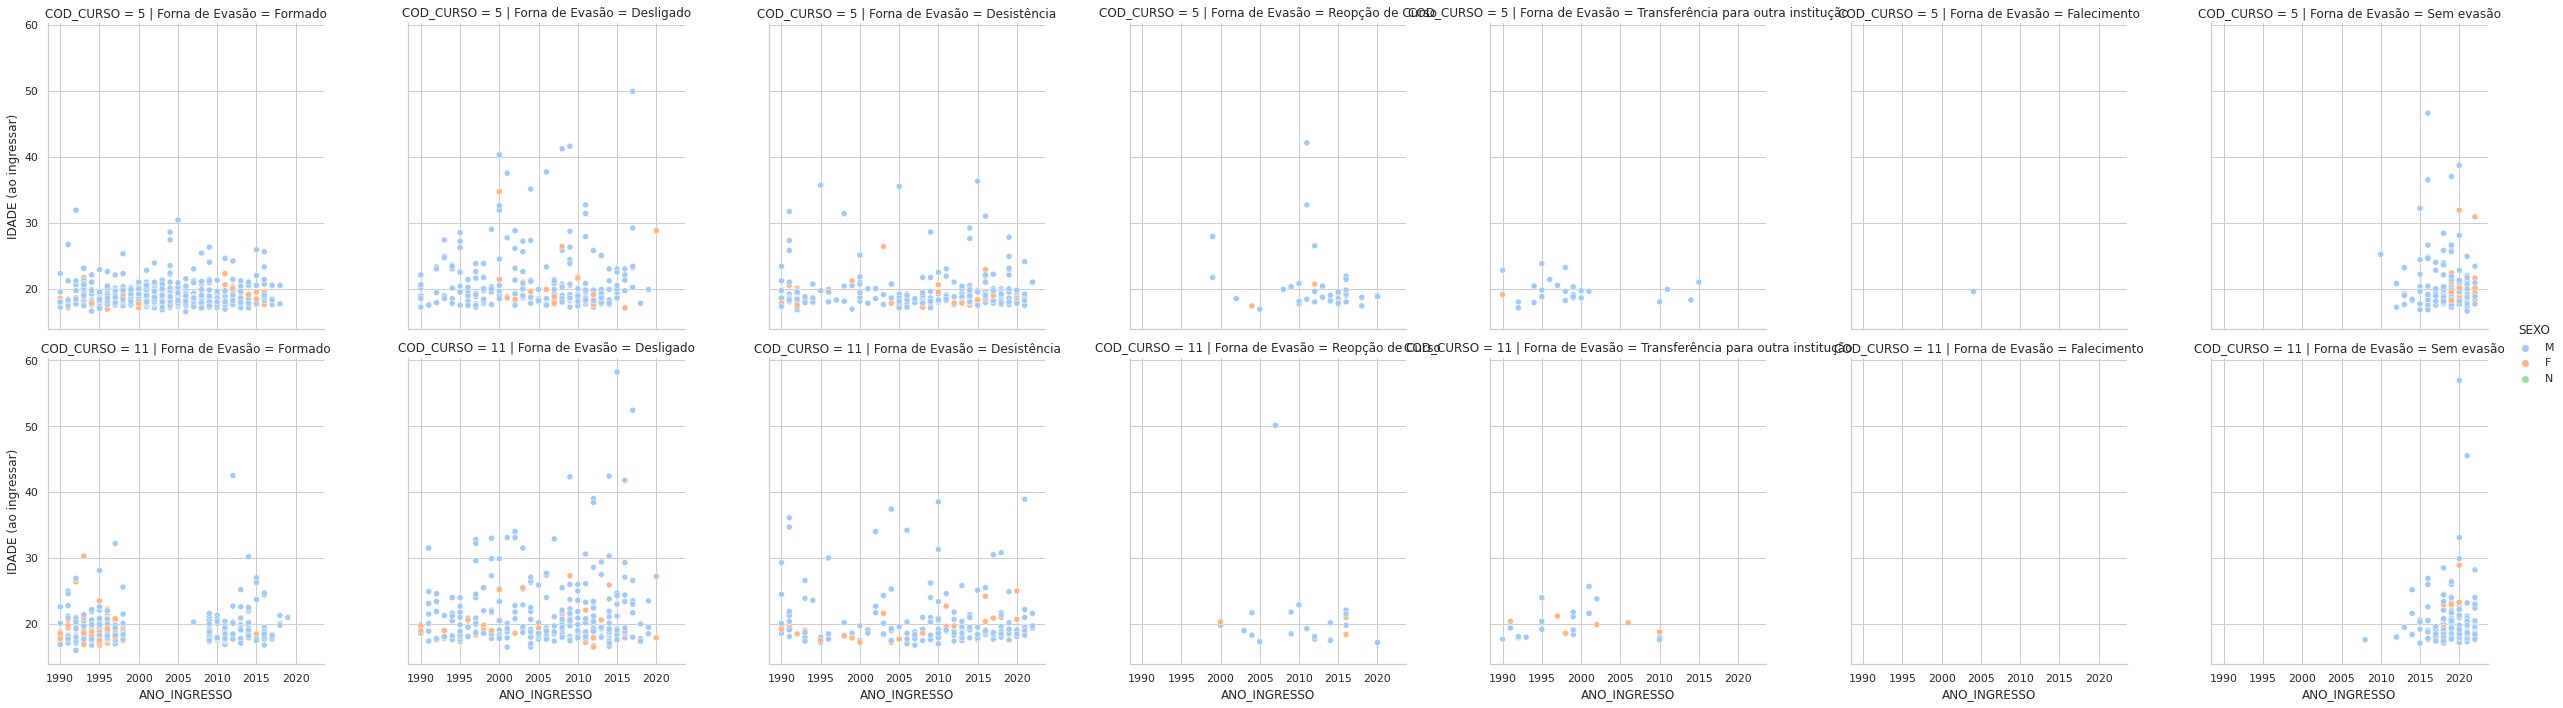

In [7]:
sns.relplot(data=df, x="ANO_INGRESSO",y="IDADE (ao ingressar)",col="Forna de Evasão",hue="SEXO",row="COD_CURSO")

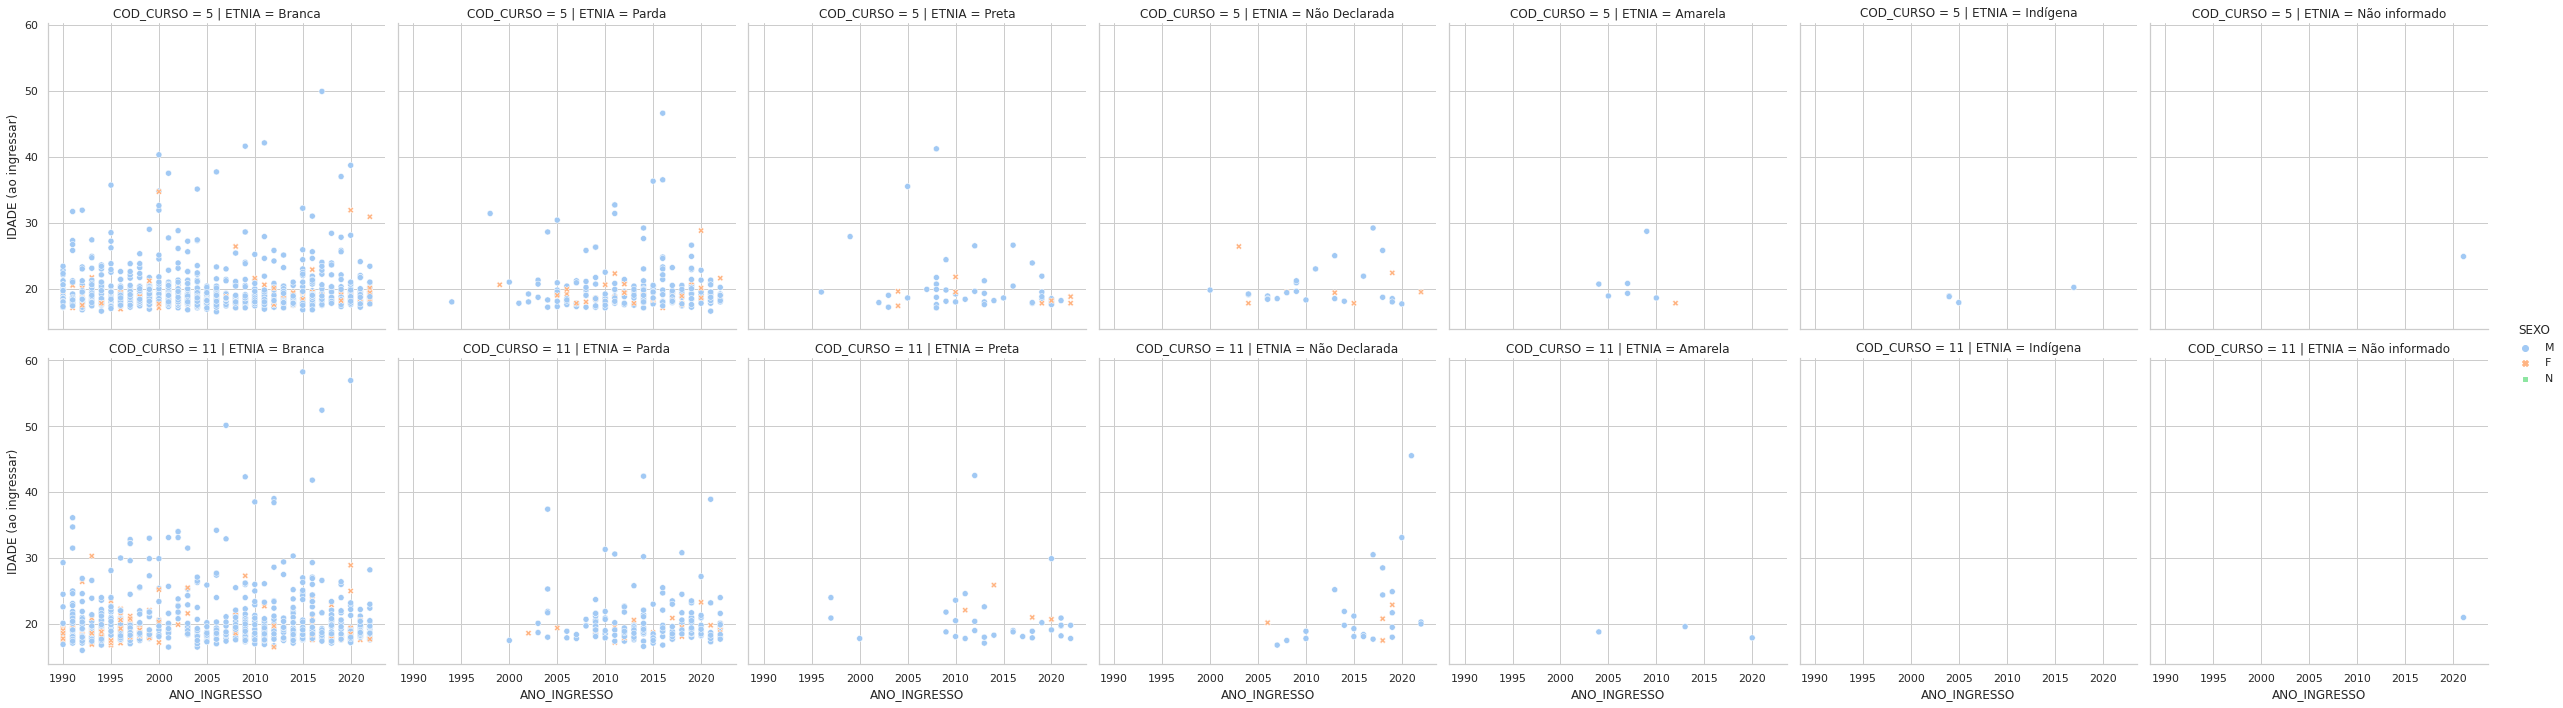

In [8]:
sns.relplot(data=df, x="ANO_INGRESSO",y="IDADE (ao ingressar)",col="ETNIA",hue="SEXO",row="COD_CURSO",style="SEXO")

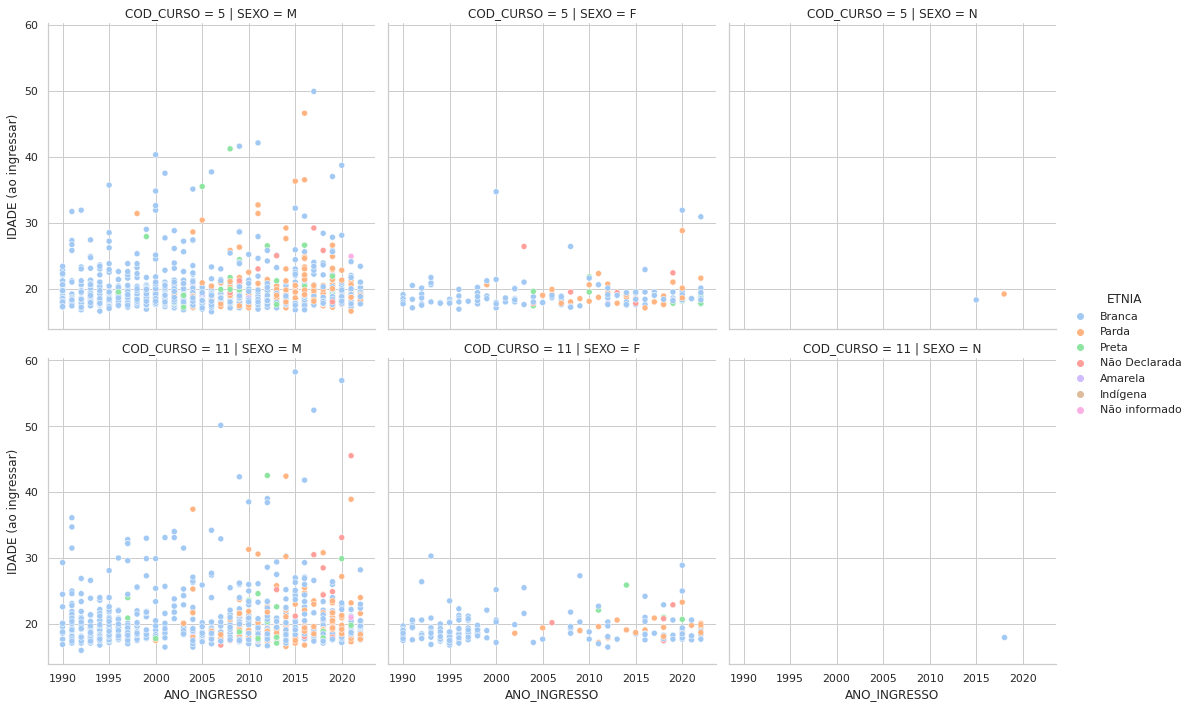

In [9]:
sns.relplot(data=df, x="ANO_INGRESSO",y="IDADE (ao ingressar)",col="SEXO",hue="ETNIA",row="COD_CURSO")

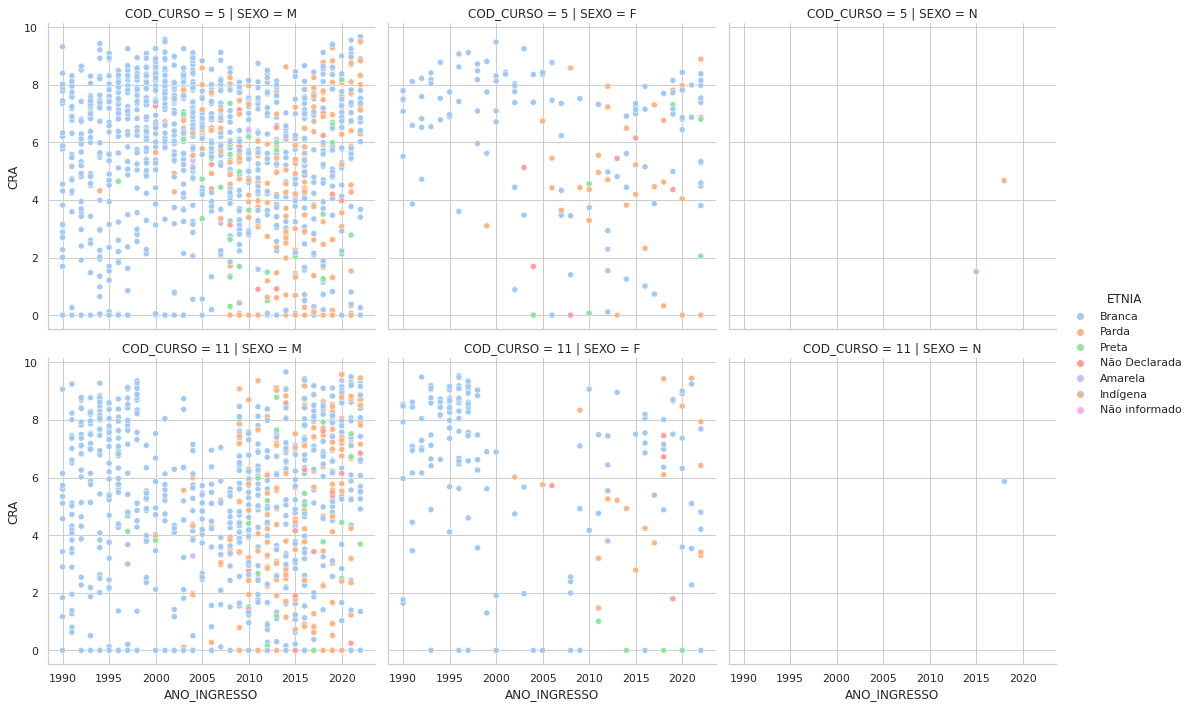

In [10]:
sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="SEXO",hue="ETNIA",row="COD_CURSO")

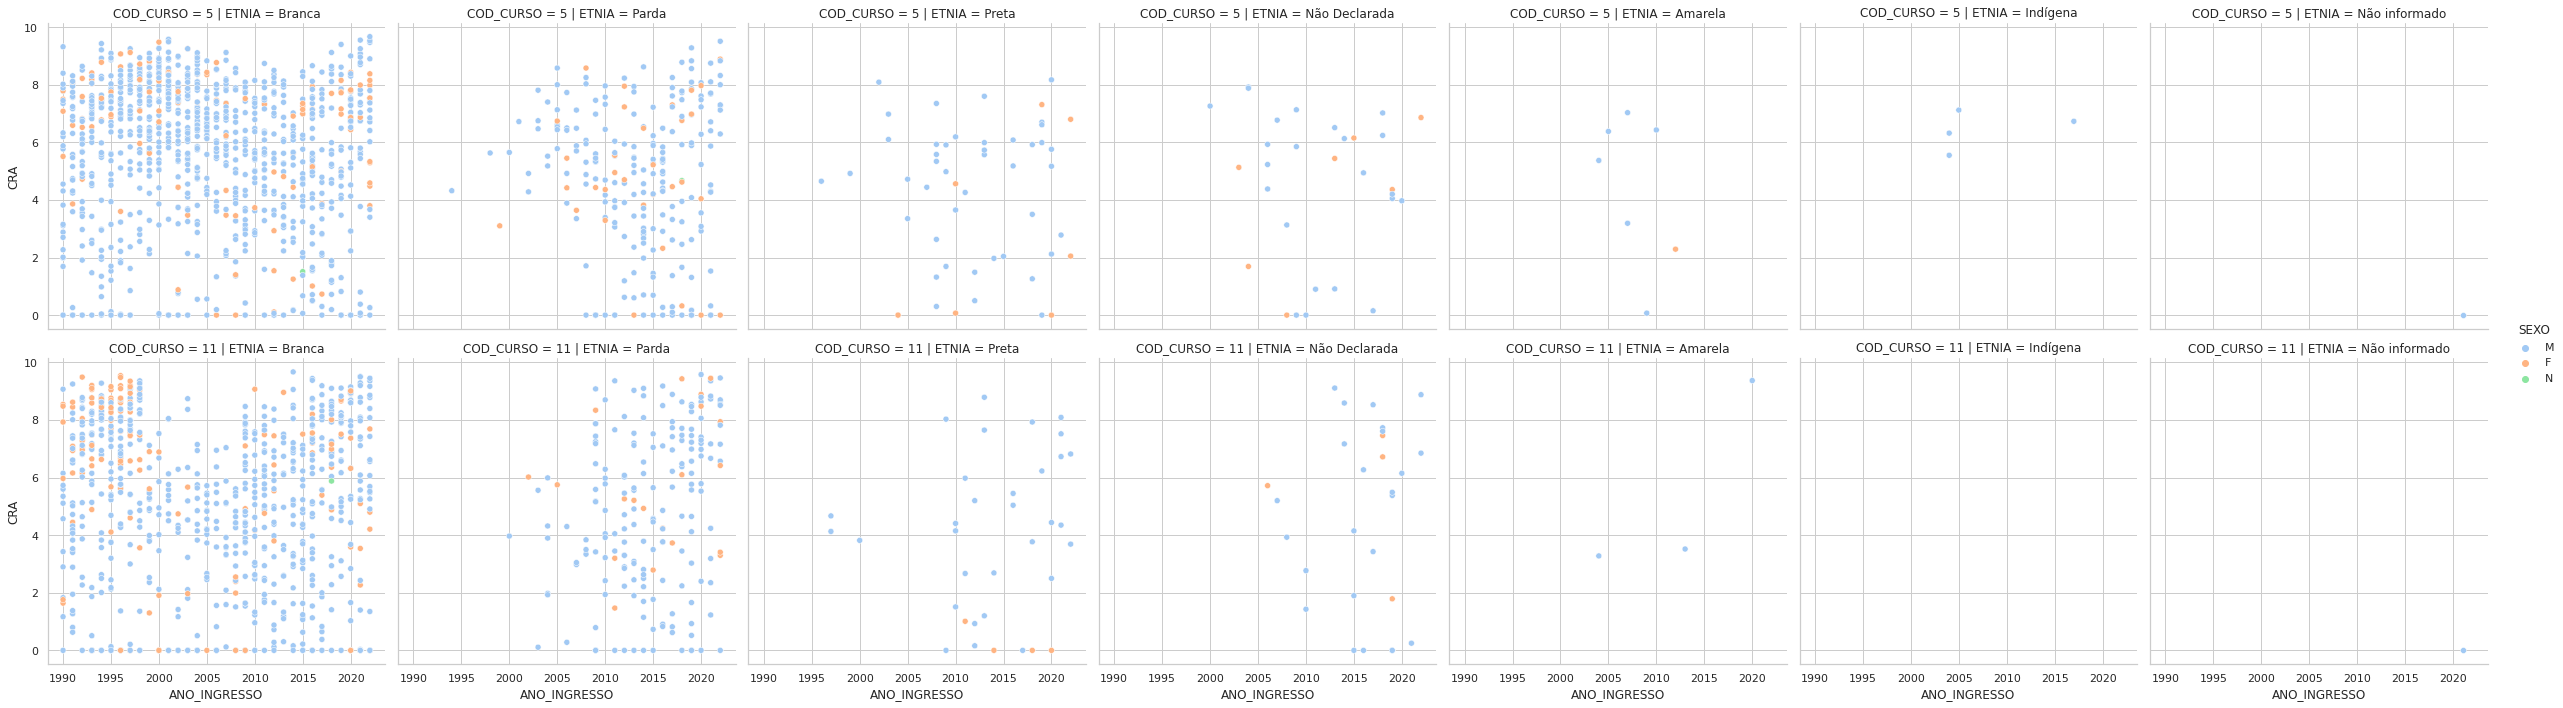

In [11]:
sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="ETNIA",hue="SEXO",row="COD_CURSO")

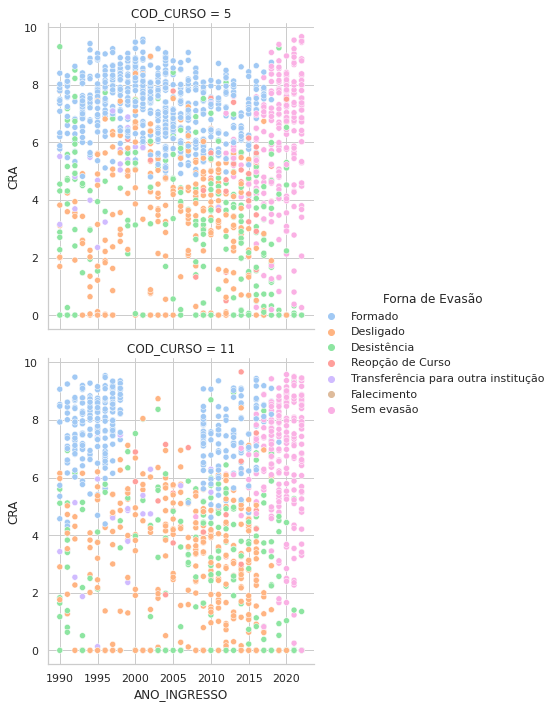

In [12]:
sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",hue="Forna de Evasão",row="COD_CURSO")

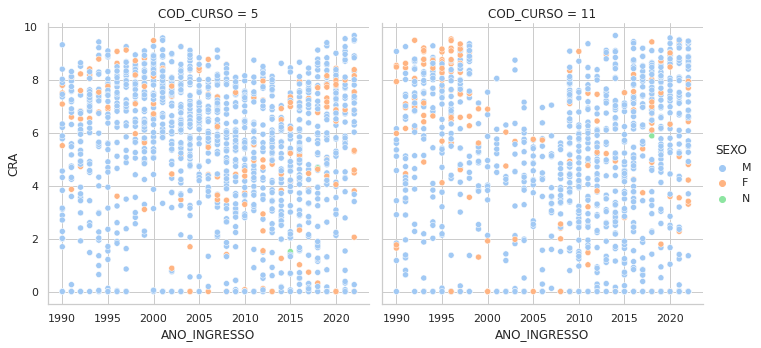

In [13]:
sns.relplot(data=df, x="ANO_INGRESSO",y="CRA",col="COD_CURSO",hue="SEXO")

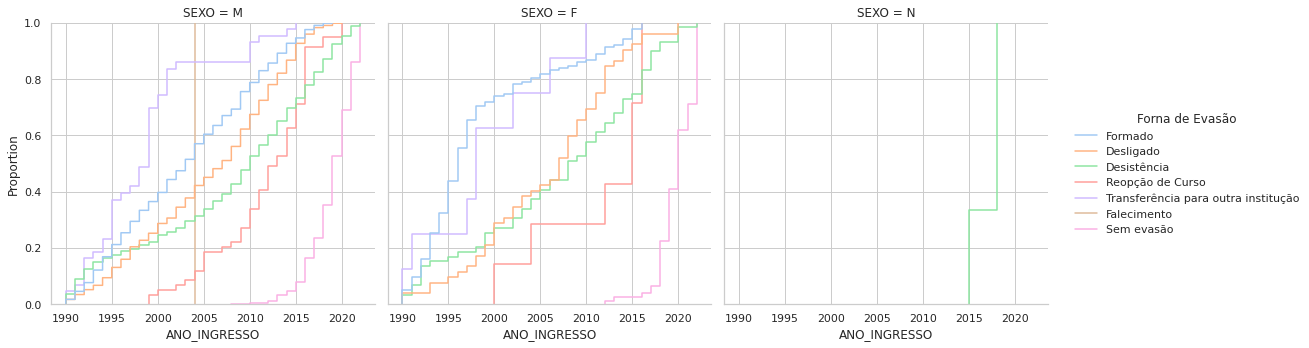

In [14]:
sns.displot(df, x="ANO_INGRESSO", hue="Forna de Evasão", kind="ecdf",col="SEXO")

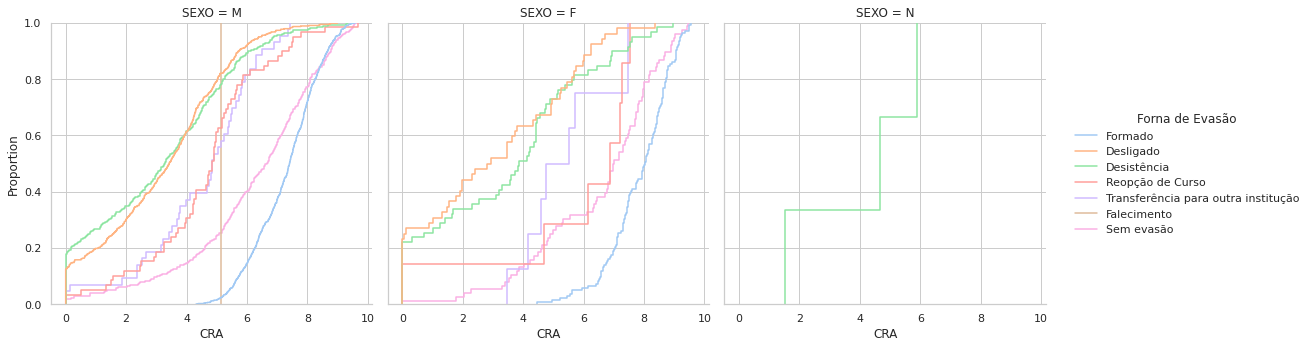

In [15]:
sns.displot(df, x="CRA", hue="Forna de Evasão", kind="ecdf",col="SEXO")

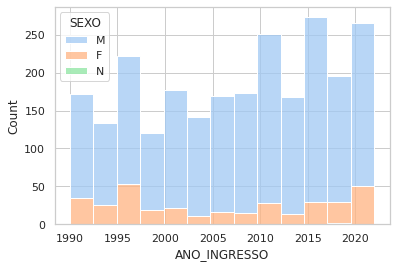

In [16]:
sns.histplot(data=df, x="ANO_INGRESSO", hue="SEXO",multiple="stack")

In [17]:
df_eng = df.loc[df["COD_CURSO"] == 5]
df_cie = df.loc[df["COD_CURSO"] == 11]

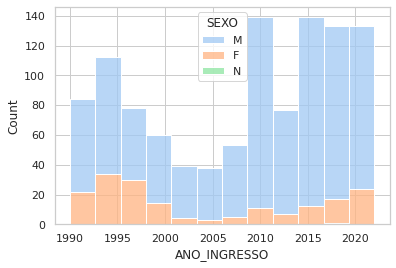

In [18]:
sns.histplot(data=df_cie, x="ANO_INGRESSO", hue="SEXO",multiple="stack")

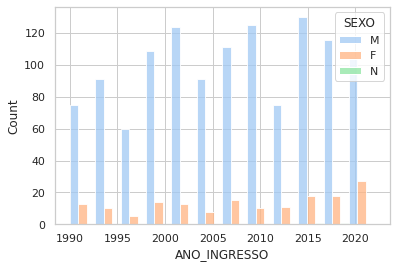

In [19]:
sns.histplot(data=df_eng, x="ANO_INGRESSO", hue="SEXO",multiple="dodge")

## Nova seção

In [20]:
def crosstabper(df, col):
  
  #total por linha
  tab = pd.crosstab(df[col],df['SEXO'])
  tab["TOTAL"] = tab["F"] + tab["M"] + tab["N"]
  
  #total por coluna
  tabper = pd.crosstab(df[col],df['SEXO']).apply(lambda r: r/r.sum(), axis=0) * 100
  
  return tab,tabper

In [21]:
def classes(row):
  if (row.ANO_INGRESSO >= 1900) & (row.ANO_INGRESSO < 1995):
    return "1990-1994"
  elif (row.ANO_INGRESSO >= 1995) & (row.ANO_INGRESSO < 2000):
    return "1995-1999"
  elif (row.ANO_INGRESSO >= 2000 ) & (row.ANO_INGRESSO < 2005):
    return "2000-2004"
  elif (row.ANO_INGRESSO >= 2005 ) & (row.ANO_INGRESSO < 2010):
    return "2005-2009"
  elif (row.ANO_INGRESSO >= 2010 ) & (row.ANO_INGRESSO < 2015):
    return "2010-2014"
  elif (row.ANO_INGRESSO >= 2015 ) & (row.ANO_INGRESSO < 2020):
    return "2015-2019"
  else:
    return "2020-"

df["INTERVALO_ANO"] = df.apply(classes, axis=1)
df_cie["INTERVALO_ANO"] = df_cie.apply(classes, axis=1)
df_eng["INTERVALO_ANO"] = df_eng.apply(classes, axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
def gera_freq(df):
  df.sort_values('ANO_INGRESSO',inplace=True)
  anos = pd.unique(df["ANO_INGRESSO"])
  df_freq = pd.DataFrame(index=anos,columns=["F","M"])

  for ano in anos:
    dim_f = df.loc[(df['SEXO'] == 'F') & (df['ANO_INGRESSO'] == ano)].shape
    dim_m = df.loc[(df['SEXO'] == 'M') & (df['ANO_INGRESSO'] == ano)].shape
    df_freq.at[ano,"F"] = dim_f[0]
    df_freq.at[ano,"M"] = dim_m[0]

  return df_freq

In [23]:
df_freq = gera_freq(df)
df_freq_per = df_freq.apply(lambda r: r/r.sum(), axis=0) * 100


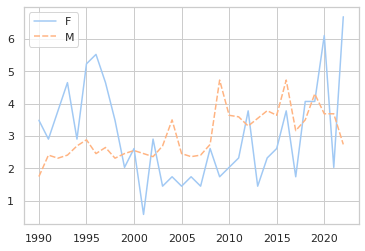

In [24]:
sns.lineplot(data=df_freq_per)

In [25]:
df_mulheres = df.loc[df['SEXO']=="F"]
df_homens = df.loc[df["SEXO"] == "M"]

In [26]:
tab_desfechos = pd.crosstab(df["ANO_EVASAO"],df["Forna de Evasão"])
tab_desfechos_mulheres = pd.crosstab(df_mulheres["ANO_EVASAO"],df_mulheres["Forna de Evasão"])
tab_desfechos_homens = pd.crosstab(df_homens["ANO_EVASAO"],df_homens["Forna de Evasão"])

In [27]:
tab_desfechos.drop(index=0,inplace=True)
tab_desfechos_mulheres.drop(index=0,inplace=True)
tab_desfechos_homens.drop(index=0,inplace=True)

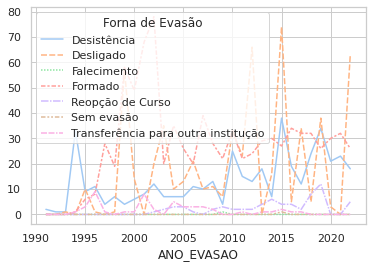

In [28]:
sns.lineplot(data=tab_desfechos)

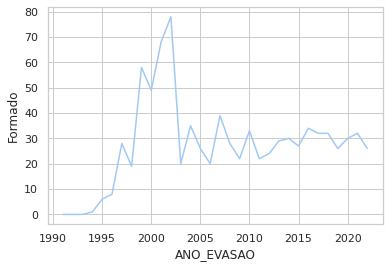

In [29]:
sns.lineplot(x=tab_desfechos.index,y=tab_desfechos['Formado'])

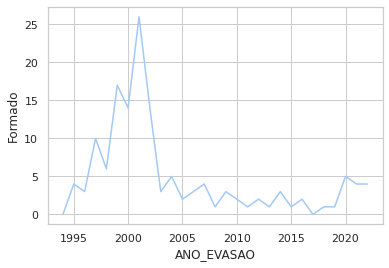

In [30]:
sns.lineplot(x=tab_desfechos_mulheres.index,y=tab_desfechos_mulheres['Formado'])

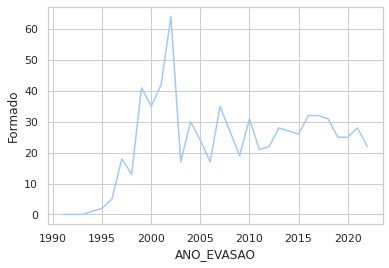

In [31]:
sns.lineplot(x=tab_desfechos_homens.index,y=tab_desfechos_homens['Formado'])

In [32]:
tab_evasao, tabper_evasao = crosstabper(df,"Forna de Evasão")
tabper_evasao

SEXO,F,M,N
Forna de Evasão,,,
Desistência,17.151163,17.407758,100.0
Desligado,15.116279,24.550615,0.0
Falecimento,0.000000,0.047304,0.0
Formado,41.279070,35.004730,0.0
Reopção de Curso,2.034884,2.790918,0.0
Sem evasão,22.093023,18.164617,0.0
Transferência para outra institução,2.325581,2.034059,0.0


In [33]:
tab_evasao_cie, tabper_evasao_cie = crosstabper(df_cie,"Forna de Evasão")
tabper_evasao_cie

SEXO,F,M,N
Forna de Evasão,,,
Desistência,13.736264,17.849224,100.0
Desligado,17.032967,31.485588,0.0
Formado,44.505495,25.831486,0.0
Reopção de Curso,1.648352,2.328160,0.0
Sem evasão,19.230769,20.509978,0.0
Transferência para outra institução,3.846154,1.995565,0.0


In [34]:
tab_evasao_eng, tabper_evasao_eng = crosstabper(df_eng,"Forna de Evasão")
tab_evasao_eng

SEXO,F,M,N,TOTAL
Forna de Evasão,,,,
Desistência,34,207,2,243
Desligado,21,235,0,256
Falecimento,0,1,0,1
Formado,61,507,0,568
Reopção de Curso,4,38,0,42
Sem evasão,41,199,0,240
Transferência para outra institução,1,25,0,26


In [43]:
tab_ano, tabper_ano = crosstabper(df,"ANO_INGRESSO")
tabper_ano

SEXO,F,M,N
ANO_INGRESSO,,,
1990,3.488372,1.750237,0.000000
1991,2.906977,2.412488,0.000000
1992,3.779070,2.317881,0.000000
1993,4.651163,2.412488,0.000000
1994,2.906977,2.696310,0.000000
1995,5.232558,2.885525,0.000000
1996,5.523256,2.459792,0.000000
1997,4.651163,2.649007,0.000000
1998,3.488372,2.317881,0.000000


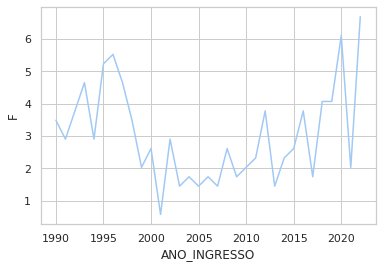

In [50]:
sns.lineplot(x=tabper_ano.index,y=tabper_ano["F"])

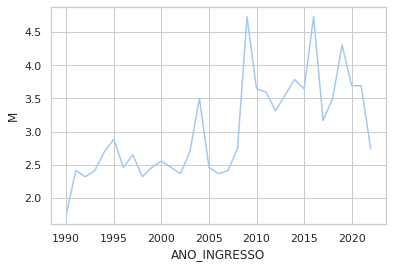

In [51]:
sns.lineplot(x=tabper_ano.index,y=tabper_ano["M"])

In [36]:
tab_cota, tabper_cota = crosstabper(df,"COTISTA")
tabper_cota

SEXO,F,M,N
COTISTA,,,
N,82.848837,81.078524,66.666667
S,17.151163,18.921476,33.333333


In [37]:
tab_etnia, tabper_etnia = crosstabper(df,"ETNIA")
tabper_etnia

SEXO,F,M,N
ETNIA,,,
Amarela,0.290698,0.425733,0.000000
Branca,77.906977,75.638600,66.666667
Indígena,0.000000,0.189215,0.000000
Não Declarada,3.197674,2.223273,0.000000
Não informado,0.000000,0.094607,0.000000
Parda,15.116279,17.928098,33.333333
Preta,3.488372,3.500473,0.000000


In [38]:
tab_estadocivil, tabper_estadocivil = crosstabper(df,"ESTADO_CIVIL (ao ingressar)")
tabper_estadocivil

SEXO,F,M,N
ESTADO_CIVIL (ao ingressar),,,
Casado(a),3.834808,5.250597,0.0
Divorciado(a),0.294985,0.238663,0.0
Outros,0.000000,0.095465,0.0
Separado Judicialmente,0.000000,0.047733,0.0
Separado(a) Judicialmente,0.294985,0.000000,0.0
Solteiro(a),94.985251,93.985680,100.0
Uniao Estavel,0.589971,0.381862,0.0


In [39]:
tab_idade, tabper_idade = crosstabper(df,"IDADE (ao ingressar)")
tabper_idade

SEXO,F,M,N
IDADE (ao ingressar),,,
16.0,0.000000,0.047416,0.0
16.5,0.292398,0.142248,0.0
16.6,0.000000,0.142248,0.0
16.7,0.000000,0.047416,0.0
16.8,0.292398,0.331911,0.0
...,...,...,...
49.9,0.000000,0.047416,0.0
50.1,0.000000,0.047416,0.0
52.4,0.000000,0.047416,0.0


In [40]:
tab_curso, tabper_curso = crosstabper(df,"COD_CURSO")
tabper_curso

SEXO,F,M,N
COD_CURSO,,,
5,47.093023,57.332072,66.666667
11,52.906977,42.667928,33.333333


In [41]:
tab_municipio, tabper_municipio = crosstabper(df,"MUNICIPIO")
tabper_municipio

SEXO,F,M,N
MUNICIPIO,,,
03 B.REPUBLICA VIT.,0.000000,0.051256,0.0
ADAMANTINA,0.000000,0.051256,0.0
AFONSO CLAUDIO,0.000000,0.153767,0.0
AGUIA BRANCA,0.000000,0.051256,0.0
ALEGRE,0.000000,0.153767,0.0
...,...,...,...
Vila Valerio,0.000000,0.051256,0.0
Vila Velha,2.795031,1.845208,0.0
Vitoria,2.795031,2.870323,0.0


In [42]:
tab_estado, tabper_estado = crosstabper(df,"ESTADO")
tabper_estado

SEXO,F,M,N
ESTADO,,,
Bahia,0.000000,0.171233,0.0
Ceará,0.000000,0.085616,0.0
ES,0.709220,2.825342,0.0
Espirito Santo,51.773050,69.691781,0.0
EspÃ­rito Santo,1.418440,1.369863,0.0
Espírito Santo,43.971631,24.486301,100.0
Estados de Outros Países,0.000000,0.256849,0.0
MA,0.709220,0.000000,0.0
Minas Gerais,0.709220,0.599315,0.0
